# Data Science – Technical Inteview

Describe the dataset and tell us why you find it interesting

*In this dataset we have information about flight delays, it is interesting to learn more about this, because it is an unavoidable event and it plays an important role in both profit and loss of airlines.*

In [19]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [22]:
# Load the data
np.random.seed(0)
data = pd.read_csv('/content/2008.csv')
data = data.sample(n=100000)

In [23]:
#for i in range(len(data.columns)):
# print(list(data.columns)[i])

In [24]:
# First 5 rows in the data
print('Dataframe dimensions:', data.shape)
data.head()

Dataframe dimensions: (100000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6181394,2008,11,18,2,1323.0,1330,1855.0,1851,US,750,...,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1086394,2008,2,23,6,749.0,800,1312.0,1340,AA,1604,...,5.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5236033,2008,9,2,2,1435.0,1424,1625.0,1620,NW,689,...,11.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4457426,2008,8,19,2,819.0,821,1030.0,1027,UA,94,...,5.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4109569,2008,7,5,6,604.0,610,937.0,945,AA,654,...,11.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


*First, we need to make a cleaning in the dataset.*

In [25]:
# Null values
info = pd.DataFrame(data.isnull().sum()).rename(columns={0:'null value'})
info['null value %'] = info['null value']*100/data.shape[0]
info['type'] = data.dtypes
info

,null value,null value %,type
Year,0,0.000,int64
Month,0,0.000,int64
DayofMonth,0,0.000,int64
DayOfWeek,0,0.000,int64
DepTime,1935,1.935,float64
CRSDepTime,0,0.000,int64
ArrTime,2161,2.161,float64
CRSArrTime,0,0.000,int64
UniqueCarrier,0,0.000,object
FlightNum,0,0.000,int64


In [26]:
# Delete columns with null data >=30%
delay = data.drop(['CancellationCode', 'CarrierDelay', 'WeatherDelay', 
                   'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [27]:
# Replace null data with column mean
delay.fillna(delay.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [28]:
delay.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2008.0,6.376320,15.708300,3.927650,1332.022077,1324.578810,1480.465959,1493.67475,2224.075120,127.456431,128.967117,104.156404,8.203522,9.936930,727.834120,6.842220,16.466625,0.019570,0.002450
std,0.0,3.398664,8.800753,1.987646,473.806568,464.836082,499.243740,482.49891,1962.731785,69.734632,69.718877,67.001480,37.984193,34.750404,565.161293,4.780992,11.415160,0.138518,0.049437
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,19.000000,1.000000,0.000000,-68.000000,-36.000000,30.000000,0.000000,1.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,931.000000,925.000000,1112.000000,1115.00000,624.000000,77.000000,80.000000,56.000000,-10.000000,-4.000000,325.000000,4.000000,10.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1331.000000,1316.000000,1480.465959,1515.00000,1571.000000,111.000000,110.000000,87.000000,-2.000000,-1.000000,581.000000,6.000000,14.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1723.000000,1715.000000,1903.000000,1907.00000,3518.000000,156.000000,159.000000,131.000000,11.000000,9.936930,954.000000,8.000000,19.000000,0.000000,0.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.00000,9741.000000,663.000000,660.000000,637.000000,1253.000000,1250.000000,4962.000000,163.000000,337.000000,1.000000,1.000000


Create a correlation plot and write down a few key observations

*A scatterplot shows the relationship between two quantitative variables measured for the same individuals.*

*We can visualize the relationship between two variables with a scatter plot. For example, it is evident that the greater the delay of a flight in its departure `DeepDelay`, the greater the delay in its arrival `ArrDelay` and the graph shows it with a strong positive correlation.*





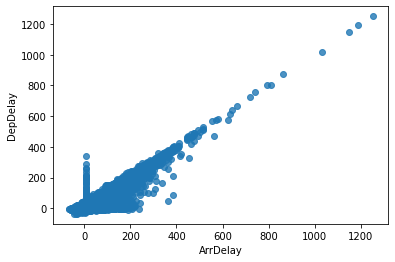

In [29]:
# Lineal Correlation
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=delay.ArrDelay, y=delay.DepDelay, alpha= 0.8)
ax.set_xlabel('ArrDelay')
ax.set_ylabel('DepDelay');

*If we want to know the correlation of all the variables, we can use a heat map. In the figure, we notice that variables such as `DepTime`, `CRSDepTime`, `ArrTime`, and `CRSArrTime` have a strong positive correlation with each other. On the other hand, the variables `ActualElapsedTime`, `CRSElapsedTime`, `AirTime` and `Distance` have a negative correlation with the `FlightNum` variable, although it would be necessary to analyze if this really makes sense.*

In [30]:
# Correlation matrix 
corr = delay.drop('Year',axis=1).corr()
corr.style.background_gradient(axis=0)  

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Month,1.000000,0.004651,-0.002006,-0.014138,-0.012521,-0.004975,-0.003594,0.000552,-0.014399,-0.006861,-0.013586,-0.041687,-0.031922,-0.006016,0.012611,-0.012820,-0.025075,0.002012
DayofMonth,0.004651,1.000000,0.010106,0.001959,0.001635,0.002475,0.002120,-0.000013,-0.000523,0.000918,-0.001128,0.003934,0.006129,0.000355,-0.002662,0.004689,-0.007433,0.000287
DayOfWeek,-0.002006,0.010106,1.000000,0.006970,0.006112,0.003684,0.006386,0.000345,0.009237,0.011124,0.010195,0.013546,0.018213,0.013197,0.009640,-0.007674,-0.010003,-0.002674
DepTime,-0.014138,0.001959,0.006970,1.000000,0.958515,0.714524,0.785434,-0.005401,-0.016667,-0.014043,-0.023814,0.175155,0.198267,-0.018417,-0.039017,0.054950,0.000477,-0.003155
CRSDepTime,-0.012521,0.001635,0.006112,0.958515,1.000000,0.690823,0.794570,-0.011284,-0.015782,-0.011111,-0.020593,0.112811,0.134565,-0.013385,-0.043608,0.043331,0.016563,-0.004170
ArrTime,-0.004975,0.002475,0.003684,0.714524,0.690823,1.000000,0.853161,-0.017936,0.039123,0.039999,0.031278,0.069291,0.077428,0.028797,0.012375,0.050086,0.000000,-0.001761
CRSArrTime,-0.003594,0.002120,0.006386,0.785434,0.794570,0.853161,1.000000,-0.027345,0.050170,0.055088,0.041812,0.112052,0.130634,0.042994,-0.000668,0.062189,0.012833,0.004699
FlightNum,0.000552,-0.000013,0.000345,-0.005401,-0.011284,-0.017936,-0.027345,1.000000,-0.317415,-0.328868,-0.331793,0.017859,0.012061,-0.350913,-0.005900,0.011183,0.038784,0.002327
ActualElapsedTime,-0.014399,-0.000523,0.009237,-0.016667,-0.015782,0.039123,0.050170,-0.317415,1.000000,0.970089,0.984054,0.095614,0.044049,0.955067,0.155338,0.267966,0.000000,-0.000000
CRSElapsedTime,-0.006861,0.000918,0.011124,-0.014043,-0.011111,0.039999,0.055088,-0.328868,0.970089,1.000000,0.978642,0.012112,0.034494,0.983049,0.102070,0.139895,-0.024330,0.020393


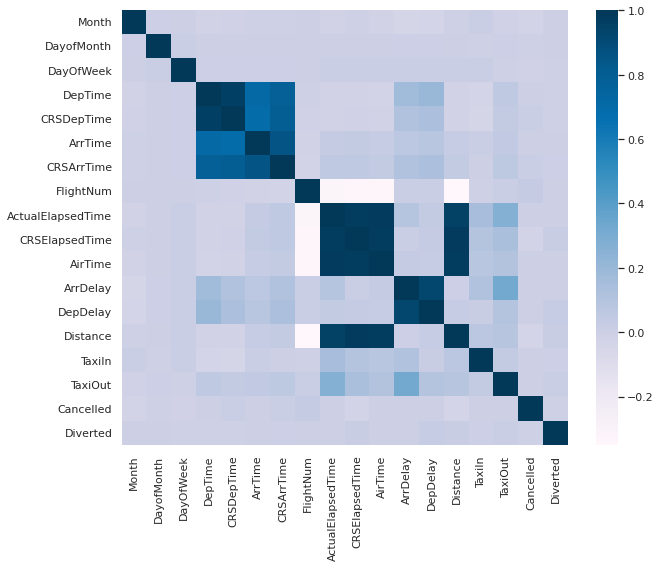

In [31]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corr,cmap = 'PuBu')

Provide 1 visualization about the information you found the most interesting.

*I chose the graph of x, as the most interesting because*

In [47]:
delay_ATL_IND = delay[delay['Origin'].isin(['ATL', 'IND'])]
times = []
# vamos a ir iterando por los indices del df
for i in delay_ATL_IND.index:
    times.append(datetime.datetime(year = 2008, 
                                  month = delay_ATL_IND.loc[i,'Month'],
                                  day = delay_ATL_IND.loc[i,'DayofMonth']))
delay_ATL_IND['Time'] = times

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


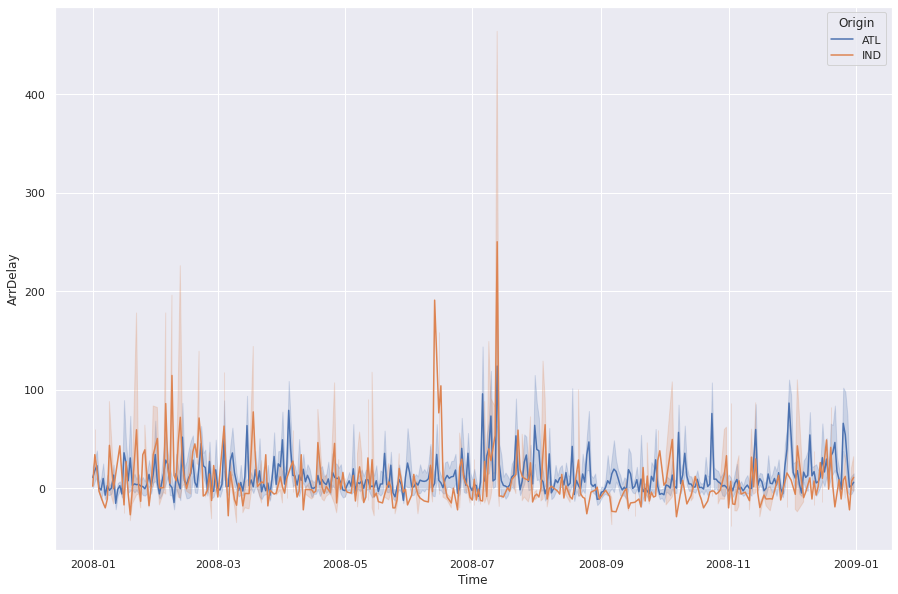

In [48]:
# Graph time vs delays in the airport of ATL and IND
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(x = 'Time', y = 'ArrDelay', hue = 'Origin', data = delay_ATL_IND)

What kind of machine learning algorithms can you use with this dataset?

*   *Linear Regression*
*   *Logistic Regression*
*   *Decision Tree* 
*   *Random Forest* 
*   *Naive Bayes* 



Select one of the algorithms from the previous question and tell us which variables you would use to build it.



Make a flowchart for the life cycle of the model you proposed.

What frameworks and libraries would you use to develop this project? Can you estimate how long it would take to deliver a first version?

*For the development of this project, libraries will be necessary according to the selected algorithm. The main aspects would be treated with*
* *visualization: matplolib, seaborn*
* *data manipulation: pandas, numpy*
* *modeling: sklearn, scipy*